In [15]:
import pandas as pd
from pandas import read_excel
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

In [16]:
series = read_excel('service-data.xlsx')
series.head()

,Invoice Date,Job Card Date,Business Partner Name,Vehicle No.,Vehicle Model,Current KM Reading,INVOICE LINE TEXT
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,ENGINE OIL
2,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,POLISH
3,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CONSUMABLES
4,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,COOLANT OIL


In [17]:
series.drop(['Invoice Date', 'Business Partner Name','Vehicle No.','Vehicle Model','Current KM Reading'], axis=1,inplace=True)

In [18]:
series.dropna(inplace=True)

In [19]:
series.shape

(28448, 2)

In [20]:
series.head(1)

,Job Card Date,INVOICE LINE TEXT
0,2017-05-30,ENGINE OIL


In [22]:
series['Job Card Date']= pd.to_datetime(series['Job Card Date'])

In [23]:
series.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28448 entries, 0 to 28481
Data columns (total 2 columns):
Job Card Date        28448 non-null datetime64[ns]
INVOICE LINE TEXT    28448 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 666.8+ KB


In [26]:
series.columns=['JobCardDate','INVOICELINETEXT']
series.head(2)

,JobCardDate,INVOICELINETEXT
0,2017-05-30,ENGINE OIL
1,2017-05-31,ENGINE OIL


In [27]:
from collections import Counter
Counter(series.INVOICELINETEXT)

Counter({'ENGINE OIL': 3802,
         'POLISH': 1245,
         'CONSUMABLES': 1595,
         'COOLANT OIL': 70,
         'CHAIN LUBRICATION': 3441,
         '4 WAY SWITCH': 2,
         '3M OIL': 1628,
         'GENERAL SERVICE': 2142,
         'OIL FILTER': 821,
         'INDICATOR': 110,
         'HEAD REST': 56,
         'VALVE GUIDE': 63,
         'TIMMING CHAIN': 78,
         'FOOT REST': 99,
         'LOW BEAM BULB': 12,
         'VALVE GRAINDING': 63,
         'DISC PAD': 575,
         'LOADING GEAR': 53,
         'PACKING KIT': 56,
         'TIMMING CHAIN PAD': 73,
         'TENSIONER': 79,
         'CLUTCH BELL REST': 21,
         'CLUTCH ASSEMBLY': 212,
         'VALVE KIT': 66,
         'SPARK PLUG': 421,
         'ONE WAY CLUTCH': 5,
         'BORE KIT': 53,
         'AIR FILTER': 1715,
         'HEAD RUBBER': 18,
         'CLUTCH CABLE': 263,
         'CRANK SHAFT': 50,
         'BRAKE ADJUSTMENT': 7,
         'BRAKE SHOE': 965,
         'AIR FILTER CHECKUP': 467,
         

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
series.INVOICELINETEXT=le.fit_transform(series.INVOICELINETEXT)

In [29]:
series = series.set_index('JobCardDate')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:      D.INVOICELINETEXT   No. Observations:                28447
Model:                 ARIMA(5, 1, 0)   Log Likelihood             -181759.935
Method:                       css-mle   S.D. of innovations            144.094
Date:                Mon, 09 Sep 2019   AIC                         363533.871
Time:                        12:49:53   BIC                         363591.661
Sample:                             1   HQIC                        363552.460
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0008      0.247     -0.003      0.997      -0.485       0.483
ar.L1.D.INVOICELINETEXT    -0.8031      0.006   -137.578      0.000      -0.815      -0.792


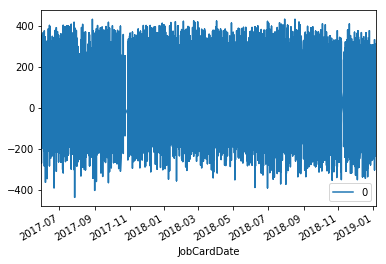

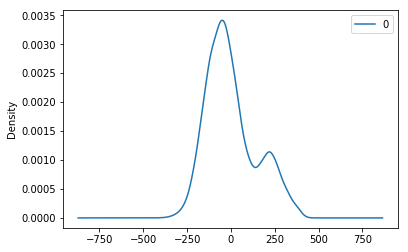

                  0
count  28447.000000
mean       0.001210
std      144.098094
min     -437.326321
25%     -102.955838
50%      -28.134823
75%       78.850441
max      430.932457


In [30]:
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

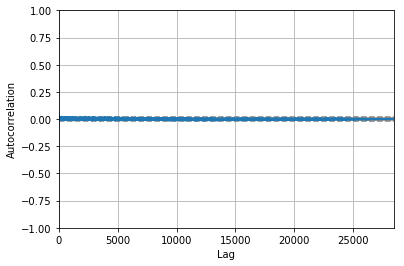

In [32]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:      D.INVOICELINETEXT   No. Observations:                28447
Model:                 ARIMA(5, 1, 0)   Log Likelihood             -181759.935
Method:                       css-mle   S.D. of innovations            144.094
Date:                Mon, 09 Sep 2019   AIC                         363533.871
Time:                        12:52:30   BIC                         363591.661
Sample:                             1   HQIC                        363552.460
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0008      0.247     -0.003      0.997      -0.485       0.483
ar.L1.D.INVOICELINETEXT    -0.8031      0.006   -137.578      0.000      -0.815      -0.792


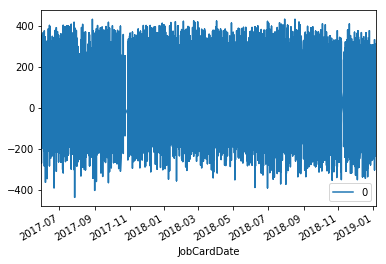

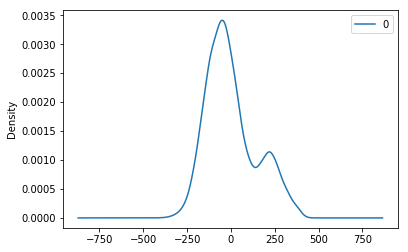

                  0
count  28447.000000
mean       0.001210
std      144.098094
min     -437.326321
25%     -102.955838
50%      -28.134823
75%       78.850441
max      430.932457


In [33]:
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [ ]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

predicted=149.358536, expected=209.000000
predicted=164.524535, expected=148.000000
predicted=152.075625, expected=209.000000
predicted=183.666240, expected=125.000000
predicted=179.534440, expected=482.000000
predicted=216.786997, expected=10.000000
predicted=189.603705, expected=46.000000
predicted=162.710283, expected=76.000000
predicted=155.040612, expected=148.000000
predicted=155.201152, expected=148.000000
predicted=156.735711, expected=209.000000
predicted=106.941826, expected=338.000000
predicted=164.205229, expected=139.000000
predicted=172.083542, expected=215.000000
predicted=196.815444, expected=77.000000
predicted=182.584303, expected=482.000000
predicted=254.703520, expected=46.000000
predicted=211.737208, expected=80.000000
predicted=167.119009, expected=407.000000
predicted=223.080481, expected=2.000000
predicted=180.202526, expected=148.000000
predicted=194.030777, expected=76.000000
predicted=121.817020, expected=46.000000
predicted=128.025482, expected=346.000000
pr

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=153.514696, expected=215.000000
predicted=174.016962, expected=80.000000
predicted=122.382151, expected=482.000000
predicted=214.747356, expected=482.000000
predicted=269.097974, expected=76.000000
predicted=247.196394, expected=148.000000
predicted=236.422391, expected=148.000000
predicted=234.410804, expected=46.000000
predicted=234.245259, expected=38.000000
predicted=156.709694, expected=407.000000
predicted=153.862080, expected=209.000000
predicted=168.582549, expected=76.000000
predicted=147.087168, expected=215.000000
predicted=160.951533, expected=407.000000
predicted=233.538746, expected=10.000000
predicted=216.442264, expected=139.000000
predicted=171.329906, expected=10.000000
predicted=137.528635, expected=80.000000
predicted=147.935388, expected=46.000000
predicted=117.291371, expected=38.000000
predicted=53.839807, expected=139.000000
predicted=78.163169, expected=46.000000
predicted=58.853073, expected=209.000000
predicted=96.342359, expected=76.000000
predicte

predicted=56.774488, expected=318.000000
predicted=110.698522, expected=148.000000
predicted=109.835054, expected=346.000000
predicted=170.041025, expected=445.000000
predicted=229.992106, expected=76.000000
predicted=213.058971, expected=108.000000
predicted=232.731090, expected=148.000000
predicted=210.513819, expected=2.000000
predicted=189.421675, expected=148.000000
predicted=159.237870, expected=209.000000
predicted=118.697691, expected=346.000000
predicted=167.163256, expected=11.000000
predicted=135.435530, expected=318.000000
predicted=172.611802, expected=268.000000
predicted=218.132105, expected=15.000000
predicted=190.312635, expected=277.000000
predicted=207.068624, expected=340.000000
predicted=209.392508, expected=67.000000
predicted=211.901074, expected=102.000000
predicted=172.342675, expected=209.000000
predicted=168.716081, expected=10.000000
predicted=167.673078, expected=407.000000
predicted=199.212765, expected=76.000000
predicted=140.531512, expected=148.000000
p

predicted=154.271781, expected=76.000000
predicted=108.279835, expected=148.000000
predicted=135.271105, expected=209.000000
predicted=155.664339, expected=209.000000
predicted=169.160525, expected=76.000000
predicted=139.914967, expected=10.000000
predicted=115.601623, expected=10.000000
predicted=109.040939, expected=76.000000
predicted=102.738573, expected=148.000000
predicted=93.803943, expected=128.000000
predicted=75.701095, expected=407.000000
predicted=136.038171, expected=125.000000
predicted=143.301679, expected=109.000000
predicted=159.590250, expected=318.000000
predicted=207.502787, expected=209.000000
predicted=218.100223, expected=346.000000
predicted=257.360190, expected=108.000000
predicted=194.607498, expected=2.000000
predicted=174.736261, expected=76.000000
predicted=176.369396, expected=148.000000
predicted=154.379694, expected=108.000000
predicted=135.559932, expected=2.000000
predicted=70.007616, expected=318.000000
predicted=114.343684, expected=76.000000
predic

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=252.540925, expected=86.000000
predicted=199.367438, expected=209.000000
predicted=235.472686, expected=125.000000
predicted=183.622757, expected=10.000000
predicted=178.049846, expected=482.000000
predicted=248.190112, expected=76.000000
predicted=161.166345, expected=209.000000
predicted=184.417363, expected=73.000000
predicted=154.428986, expected=10.000000
predicted=141.854006, expected=148.000000
predicted=171.274659, expected=209.000000
predicted=125.874138, expected=125.000000
predicted=129.777451, expected=80.000000
predicted=102.924154, expected=482.000000
predicted=183.676489, expected=77.000000
predicted=182.801647, expected=407.000000
predicted=233.500061, expected=359.000000
predicted=252.789349, expected=76.000000
predicted=240.897841, expected=2.000000
predicted=225.911851, expected=148.000000
predicted=179.275509, expected=346.000000
predicted=236.542451, expected=108.000000
predicted=173.473522, expected=108.000000
predicted=125.319735, expected=76.000000
pre

predicted=160.176342, expected=76.000000
predicted=127.016606, expected=148.000000
predicted=155.063435, expected=346.000000
predicted=147.576395, expected=108.000000
predicted=133.977020, expected=318.000000
predicted=165.968067, expected=108.000000
predicted=177.559062, expected=2.000000
predicted=167.149473, expected=76.000000
predicted=159.533481, expected=148.000000
predicted=131.759537, expected=455.000000
predicted=198.247121, expected=407.000000
predicted=202.119362, expected=465.000000
predicted=256.740800, expected=281.000000
predicted=294.697867, expected=453.000000
predicted=367.735062, expected=31.000000
predicted=339.304759, expected=464.000000
predicted=358.246921, expected=84.000000
predicted=292.426244, expected=245.000000
predicted=262.919765, expected=57.000000
predicted=217.353997, expected=280.000000
predicted=198.593404, expected=148.000000
predicted=214.538407, expected=147.000000
predicted=159.070720, expected=142.000000
predicted=168.064564, expected=463.000000

predicted=185.150405, expected=346.000000
predicted=252.307814, expected=108.000000
predicted=188.897474, expected=128.000000
predicted=131.839499, expected=148.000000
predicted=156.418892, expected=11.000000
predicted=133.826951, expected=76.000000
predicted=137.958967, expected=2.000000
predicted=77.485749, expected=125.000000
predicted=86.032746, expected=165.000000
predicted=91.476293, expected=209.000000
predicted=100.258322, expected=76.000000
predicted=104.259799, expected=148.000000
predicted=118.563795, expected=43.000000
predicted=124.906101, expected=46.000000
predicted=114.570591, expected=10.000000
predicted=88.051649, expected=482.000000
predicted=148.169482, expected=319.000000
predicted=178.949001, expected=346.000000
predicted=205.340852, expected=108.000000
predicted=204.444490, expected=385.000000
predicted=276.700190, expected=10.000000
predicted=270.745002, expected=2.000000
predicted=191.773853, expected=76.000000
predicted=154.993555, expected=148.000000
predicte

predicted=121.695691, expected=268.000000
predicted=153.705720, expected=456.000000
predicted=214.648313, expected=282.000000
predicted=256.246551, expected=1.000000
predicted=233.730928, expected=148.000000
predicted=212.682476, expected=267.000000
predicted=244.178979, expected=177.000000
predicted=227.245904, expected=399.000000
predicted=217.944291, expected=209.000000
predicted=194.964904, expected=166.000000
predicted=223.161517, expected=10.000000
predicted=196.739442, expected=166.000000
predicted=190.614660, expected=466.000000
predicted=250.529311, expected=76.000000
predicted=178.362618, expected=237.000000
predicted=183.841265, expected=394.000000
predicted=226.262779, expected=125.000000
predicted=241.645714, expected=46.000000
predicted=218.369166, expected=373.000000
predicted=213.041676, expected=445.000000
predicted=280.433776, expected=407.000000
predicted=302.192870, expected=76.000000
predicted=230.257126, expected=318.000000
predicted=274.806383, expected=109.00000

predicted=294.673563, expected=76.000000
predicted=295.838459, expected=148.000000
predicted=265.630241, expected=209.000000
predicted=238.892162, expected=421.000000
predicted=301.843849, expected=209.000000
predicted=255.968138, expected=235.000000
predicted=211.937539, expected=300.000000
predicted=252.290879, expected=407.000000
predicted=302.256689, expected=127.000000
predicted=278.185879, expected=125.000000
predicted=227.920166, expected=148.000000
predicted=222.137207, expected=10.000000
predicted=185.494272, expected=76.000000
predicted=151.344443, expected=482.000000
predicted=174.447315, expected=10.000000
predicted=136.042188, expected=318.000000
predicted=175.876672, expected=148.000000
predicted=167.180691, expected=125.000000
predicted=192.681719, expected=24.000000
predicted=181.277943, expected=209.000000
predicted=142.322340, expected=10.000000
predicted=138.165423, expected=346.000000
predicted=152.215784, expected=482.000000
predicted=207.268148, expected=108.00000

predicted=128.099532, expected=177.000000
predicted=151.281616, expected=148.000000
predicted=149.425356, expected=128.000000
predicted=161.602611, expected=125.000000
predicted=149.584485, expected=421.000000
predicted=230.351466, expected=174.000000
predicted=193.860352, expected=76.000000
predicted=171.746303, expected=127.000000
predicted=170.676554, expected=318.000000
predicted=213.993252, expected=386.000000
predicted=259.632237, expected=482.000000
predicted=264.858562, expected=482.000000
predicted=310.284801, expected=318.000000
predicted=344.345734, expected=125.000000
predicted=341.042471, expected=76.000000
predicted=305.561596, expected=148.000000
predicted=275.457142, expected=421.000000
predicted=275.801426, expected=108.000000
predicted=197.435775, expected=2.000000
predicted=137.422416, expected=2.000000
predicted=119.469735, expected=346.000000
predicted=183.368125, expected=109.000000
predicted=168.293290, expected=76.000000
predicted=103.100761, expected=209.000000

predicted=174.280665, expected=46.000000
predicted=172.306145, expected=80.000000
predicted=132.439627, expected=77.000000
predicted=81.436925, expected=10.000000
predicted=73.347310, expected=215.000000
predicted=90.123805, expected=318.000000
predicted=130.640875, expected=94.000000
predicted=128.651957, expected=208.000000
predicted=150.833288, expected=422.000000
predicted=215.743894, expected=407.000000
predicted=283.065142, expected=130.000000
predicted=255.397614, expected=10.000000
predicted=199.060123, expected=125.000000
predicted=216.196641, expected=90.000000
predicted=202.437565, expected=128.000000
predicted=153.498661, expected=421.000000
predicted=159.635217, expected=77.000000
predicted=136.038648, expected=148.000000
predicted=160.977776, expected=80.000000
predicted=151.466478, expected=209.000000
predicted=182.053293, expected=108.000000
predicted=175.458586, expected=346.000000
predicted=167.085446, expected=2.000000
predicted=141.415766, expected=76.000000
predict

predicted=173.887189, expected=407.000000
predicted=222.049637, expected=148.000000
predicted=215.845138, expected=76.000000
predicted=163.027822, expected=422.000000
predicted=247.636862, expected=46.000000
predicted=234.293963, expected=421.000000
predicted=261.852821, expected=385.000000
predicted=250.340296, expected=410.000000
predicted=295.885981, expected=10.000000
predicted=269.385322, expected=76.000000
predicted=215.921188, expected=209.000000
predicted=256.631512, expected=148.000000
predicted=212.925633, expected=422.000000
predicted=222.945140, expected=125.000000
predicted=158.331021, expected=10.000000
predicted=156.019543, expected=209.000000
predicted=187.085004, expected=422.000000
predicted=234.057356, expected=77.000000
predicted=209.708480, expected=127.000000
predicted=155.316871, expected=125.000000
predicted=156.750314, expected=215.000000
predicted=201.546715, expected=478.000000
predicted=252.968694, expected=55.000000
predicted=171.269797, expected=139.000000

predicted=118.805295, expected=148.000000
predicted=134.664639, expected=482.000000
predicted=185.088532, expected=125.000000
predicted=175.980393, expected=108.000000
predicted=195.739524, expected=242.000000
predicted=242.213383, expected=10.000000
predicted=182.851129, expected=76.000000
predicted=175.571552, expected=148.000000
predicted=119.392578, expected=209.000000
predicted=137.390175, expected=46.000000
predicted=119.710455, expected=46.000000
predicted=84.465736, expected=460.000000
predicted=174.784096, expected=139.000000
predicted=174.527513, expected=482.000000
predicted=237.187226, expected=148.000000
predicted=210.299901, expected=318.000000
predicted=265.143710, expected=346.000000
predicted=317.427378, expected=76.000000
predicted=245.464666, expected=108.000000
predicted=243.147502, expected=2.000000
predicted=160.945058, expected=76.000000
predicted=157.928640, expected=148.000000
predicted=131.583886, expected=108.000000
predicted=87.847998, expected=346.000000
pr

predicted=123.302822, expected=148.000000
predicted=140.094285, expected=422.000000
predicted=188.016517, expected=80.000000
predicted=182.517345, expected=10.000000
predicted=159.670956, expected=331.000000
predicted=189.966013, expected=139.000000
predicted=190.216772, expected=421.000000
predicted=244.341482, expected=127.000000
predicted=177.208443, expected=172.000000
predicted=195.426322, expected=209.000000
predicted=232.586039, expected=176.000000
predicted=208.098117, expected=171.000000
predicted=214.571575, expected=174.000000
predicted=170.399385, expected=422.000000
predicted=228.349885, expected=407.000000
predicted=264.846878, expected=125.000000
predicted=237.709197, expected=209.000000
predicted=244.837831, expected=10.000000
predicted=216.705121, expected=421.000000
predicted=278.481579, expected=80.000000
predicted=207.871980, expected=77.000000
predicted=149.752148, expected=148.000000
predicted=155.165181, expected=10.000000
predicted=121.722482, expected=209.00000

predicted=77.374924, expected=76.000000
predicted=75.444671, expected=125.000000
predicted=85.452469, expected=10.000000
predicted=69.963792, expected=209.000000
predicted=95.496547, expected=407.000000
predicted=154.289220, expected=422.000000
predicted=214.271760, expected=124.000000
predicted=206.536657, expected=108.000000
predicted=202.137710, expected=76.000000
predicted=219.934246, expected=2.000000
predicted=190.593073, expected=148.000000
predicted=152.855605, expected=346.000000
predicted=143.464038, expected=346.000000
predicted=176.845070, expected=108.000000
predicted=163.102046, expected=2.000000
predicted=146.305582, expected=148.000000
predicted=182.549701, expected=76.000000
predicted=174.640338, expected=148.000000
predicted=143.086198, expected=108.000000
predicted=97.569958, expected=2.000000
predicted=76.158230, expected=76.000000
predicted=92.780487, expected=346.000000
predicted=135.311101, expected=108.000000
predicted=131.581264, expected=2.000000
predicted=99.

predicted=142.858602, expected=346.000000
predicted=211.928837, expected=108.000000
predicted=208.863746, expected=76.000000
predicted=198.634145, expected=10.000000
predicted=139.081969, expected=148.000000
predicted=116.909019, expected=76.000000
predicted=130.854680, expected=148.000000
predicted=96.505826, expected=108.000000
predicted=93.432223, expected=346.000000
predicted=145.205076, expected=318.000000
predicted=194.659964, expected=2.000000
predicted=156.723141, expected=2.000000
predicted=144.691020, expected=148.000000
predicted=155.276064, expected=76.000000
predicted=153.828405, expected=346.000000
predicted=159.030237, expected=108.000000
predicted=110.218616, expected=80.000000
predicted=120.874856, expected=235.000000
predicted=166.240251, expected=99.000000
predicted=156.565746, expected=478.000000
predicted=236.084921, expected=148.000000
predicted=187.479843, expected=353.000000
predicted=232.402039, expected=209.000000
predicted=249.489281, expected=492.000000
pred